In [20]:
import sys
REPO_PATH='/home/brook/kaggle/planet/repo'
sys.path.append(REPO_PATH)

In [21]:
import os
import numpy as np
from importlib import reload
import utils
from keras import backend as K

In [22]:
from skimage import io

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
import models.vgglike as vl
import models.ekami as ek
import data.planet as data
import data.dfgen as gen
reload(data)
reload(gen)
reload(vl)
reload(utils)
reload(data)
reload(gen)
reload(ek)
reload(utils)

<module 'utils' from '/home/brook/kaggle/planet/repo/utils.py'>

In [25]:
# USE THESE SETTINGS FOR A REALISTIC SAMPLE
KG_ROOT='/home/brook/kaggle/planet'
DATA_ROOT=os.environ.get('DATA')
DATA_DIR='planet'
WEIGHT_ROOT=os.environ.get('WEIGHTS')
IMG_TYPE='tif'
ROOT=f'{DATA_ROOT}/{DATA_DIR}'
WEIGHT_DIR=f'{WEIGHT_ROOT}/{DATA_DIR}'
JPG_DIR = os.path.join(ROOT, 'train-jpg')
TIF_DIR = os.path.join(ROOT, 'train-tif')

In [26]:
pld=data.PlanetData(train_size=2000)

In [27]:
pld.train_size, pld.valid_size

(2000, 400)

## OK what happend

In [41]:
#
# Prediction for random image in dataframe df
#
def predict_random(model_obj,df,kloss=True,file_ext='tif',image_dir='train-tif',noisy=True,return_image=True):
    imdf=df.sample()
    pred,img=model_obj.predict_image(
        imdf.image_name.values[0],
        file_ext='tif',
        image_dir='train-tif',
        return_image=True)
    im_name=imdf.image_name.values[0]
    vec=imdf.vec.values[0]
    prediction=[int(i) for i in pred[0]]
    eq=np.array_equal(vec,prediction)
    loss=utils.cos_distance(vec,prediction,return_type='float')
    loss="%.3f" % round(loss,3)
    if kloss:
        # keras
        kvec=K.variable(vec)
        kprediction=K.variable(prediction)
        kf2=utils.k_f2(kvec,kprediction,return_type='float')
        kf2loss=1-kf2
        kf2loss="%.3f" % round(kf2loss,3)
        # np
        f2=utils.f2_score(vec,prediction,average='binary')
        f2loss=1-f2
        f2loss="%.3f" % round(f2loss,3)
        # out
        loss=f'{loss}|{kf2loss}|{f2loss}'
    
    if noisy:
        print('\nimage:',im_name)
        print('vec:',vec)
        print('prd:',prediction)
        print('equal:',eq)
        print('dist:',loss)
    if return_image:
        return loss, eq, im_name, img
    else:
        return loss, eq

    
    
#
# Avg Losses for N random
#
def test_random(model_obj,df,n,noisy=False):
    losses=[]
    kf2losses=[]
    f2losses=[]
    eqs=[]
    for i in range(n):
        loss,eq=predict_random(model_obj,df,kloss=True,noisy=noisy,return_image=False)
        loss=loss.split('|')
        losses.append(float(loss[0]))
        kf2losses.append(float(loss[1]))
        f2losses.append(float(loss[2]))
        eqs.append(int(eq))
    return np.mean(losses),np.mean(kf2losses),np.mean(f2losses),np.mean(eqs)


#
# Display N random
#
def _run_random(model_obj,df):
    loss, eq, im_name, _ = predict_random(model_obj,df)
    impath=f'{JPG_DIR}/{im_name}.jpg'
    title=f'\n{eq}, LOSS: {loss}'
    im=io.imread(impath)
    return title, im

def display_random(model_obj,df,n,w=12,h=4):
    im_tuples=[]
    for i in range(n):
        im_tuples.append(_run_random(model_obj,df))
    fig = plt.figure()
    fig.set_size_inches(w, h)
    for i,title_im in enumerate(im_tuples):
        a = fig.add_subplot(1, n, i+1)
        a.set_title(title_im[0])
        plt.imshow(title_im[1])

In [10]:
ek_cos=ek.EKAMI(metrics=['accuracy',utils.k_f2])
ek_cos.load_weights(f'ek_cos_break.hdf5')

/home/brook/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



image: train_28186
vec: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
prd: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
equal: False
dist: 1.000|1.000|1.000

image: train_39429
vec: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
prd: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
equal: False
dist: 1.000|1.000|1.000

image: train_15093
vec: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
prd: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
equal: False
dist: 1.000|1.000|1.000


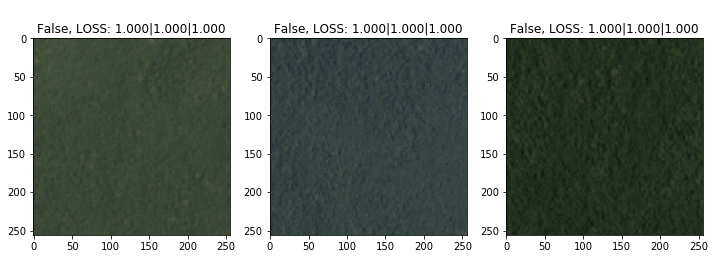

In [11]:
display_random(ek_cos,pld.train_df,3)

/home/brook/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



image: train_25888
vec: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
prd: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
equal: False
dist: 1.000|1.000|1.000

image: train_37577
vec: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
prd: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
equal: False
dist: 0.293|0.444|0.444

image: train_6961
vec: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
prd: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
equal: True
dist: 0.000|0.000|0.000


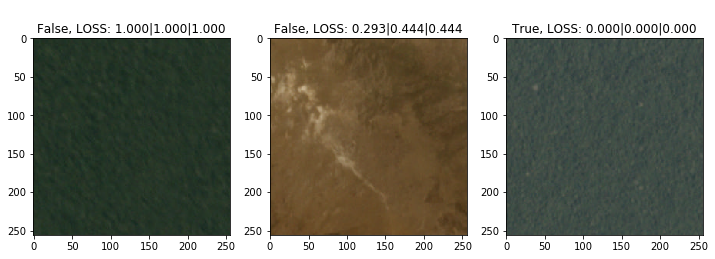

In [12]:
display_random(ek_cos,pld.train_df,3)

/home/brook/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



image: train_31819
vec: [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
prd: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
equal: False
dist: 1.000|1.000|1.000

image: train_31226
vec: [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
prd: [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
equal: False
dist: 0.293|0.444|0.444

image: train_35873
vec: [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
prd: [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
equal: True
dist: 0.000|0.000|0.000


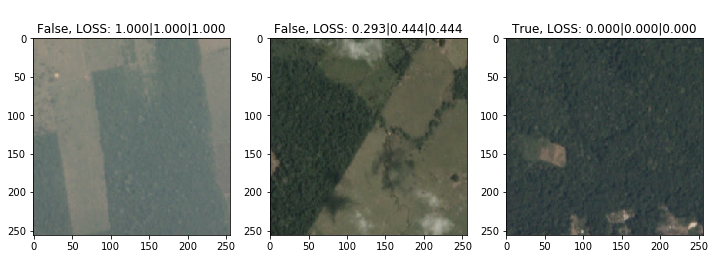

In [13]:
display_random(ek_cos,pld.train_df,3)

In [14]:
test_random(ek_cos,pld.train_df,150)

/home/brook/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.47880666666666666,
 0.5218533333333335,
 0.5218533333333335,
 0.32666666666666666)

## F2

In [18]:
a=[1,1,0,1,1]
b=[1,1,1,0,0]
f2=utils.f2_score(a,b,average='binary')
kf2=utils.k_f2(
    K.variable(a),
    K.variable(b),
    return_type='float')
print(f2,kf2)

0.526315789474 0.526316


In [19]:
def precision(v,p):
    v=np.array(v)
    p=np.array(p)
    tpa=[pred*int(eq) for (pred,eq) in zip(p,np.equal(v,p))]
    fpa=[pred*int(not eq) for (pred,eq) in zip(p,np.equal(v,p))]
    print('tp:',tpa)
    print('fp:',fpa)
    tp=sum(tpa)
    fp=sum(fpa)
    return tp/(fp+tp)

precision(a,b)

tp: [1, 1, 0, 0, 0]
fp: [0, 0, 1, 0, 0]


0.66666666666666663

In [20]:
def recall(v,p):
    v=np.array(v)
    p=np.array(p)
    tpa=[pred*int(eq) for (pred,eq) in zip(p,np.equal(v,p))]
    fna=[(1-pred)*int(not eq) for (pred,eq) in zip(p,np.equal(v,p))]
    print('tp:',tpa)
    print('fn:',fna)
    tp=sum(tpa)
    fn=sum(fna)
    return tp/(fn+tp)

recall(a,b) 


tp: [1, 1, 0, 0, 0]
fn: [0, 0, 0, 1, 1]


0.5

In [21]:
def f2(a,b):
    print('\n--------------------')
    pc=precision(a,b)
    rc=recall(a,b)
    return 5 * pc * rc / ((4*pc) + rc)

f2(a,b)


--------------------
tp: [1, 1, 0, 0, 0]
fp: [0, 0, 1, 0, 0]
tp: [1, 1, 0, 0, 0]
fn: [0, 0, 0, 1, 1]


0.52631578947368418

In [23]:
a1=[1,0,1,1,1]
b1=[1,0,0,0,0]
a2=[1,1,0,1,1]
b2=[0,1,1,0,0]
a3=[1,0,0,1,1]
b3=[1,0,1,0,0]
a4=[1,1,0,0,0]
b4=[1,1,1,0,0]
a_list=[a1,a2,a3,a4]
b_list=[b1,b2,b3,b4]
pairs=[(a,b) for a,b in zip(a_list,b_list)]

In [25]:
scores=[f2(x,y) for (x,y) in pairs]
print("\nscores:",scores)
print("avg:",np.average(scores))


--------------------
tp: [1, 0, 0, 0, 0]
fp: [0, 0, 0, 0, 0]
tp: [1, 0, 0, 0, 0]
fn: [0, 0, 1, 1, 1]

--------------------
tp: [0, 1, 0, 0, 0]
fp: [0, 0, 1, 0, 0]
tp: [0, 1, 0, 0, 0]
fn: [1, 0, 0, 1, 1]

--------------------
tp: [1, 0, 0, 0, 0]
fp: [0, 0, 1, 0, 0]
tp: [1, 0, 0, 0, 0]
fn: [0, 0, 0, 1, 1]

--------------------
tp: [1, 1, 0, 0, 0]
fp: [0, 0, 1, 0, 0]
tp: [1, 1, 0, 0, 0]
fn: [0, 0, 0, 0, 0]

scores: [0.29411764705882354, 0.27777777777777779, 0.3571428571428571, 0.90909090909090906]
avg: 0.459532297768


In [26]:
utils.f2_score(a_list,b_list,average='samples')

0.45953229776759186

In [28]:
utils.k_f2(
    K.variable(a_list),
    K.variable(b_list),
    return_type='float')

0.41666669

# whats happening with k_f2?

In [33]:
 ka=K.variable(a_list)
 kb=K.variable(b_list)
print(np.array(a_list))
print()
print(np.array(b_list))

[[1 0 1 1 1]
 [1 1 0 1 1]
 [1 0 0 1 1]
 [1 1 0 0 0]]

[[1 0 0 0 0]
 [0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 1 0 0]]


In [39]:
# ==> pairwise multiply ... whats this called?
print(K.eval(ka*kb))
print()
# ==> subtract from every element...
print(K.eval(1-kb)) 


[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.]]

[[ 0.  1.  1.  1.  1.]
 [ 1.  0.  0.  1.  1.]
 [ 0.  1.  0.  1.  1.]
 [ 0.  0.  0.  1.  1.]]


In [46]:
# then it should work - no?
tpa=ka*kb
fpa=(1-ka)*kb
fna=ka*(1-kb)
tp=K.sum(tpa)
fp=K.sum(fpa)
fn=K.sum(fna)

In [50]:
precision = tp/(tp + fp)
recall = tp/(tp + fn)
f2val=5*precision*recall/((4* precision) + recall)
K.eval(f2val)

0.41666669

In [52]:
print('samples',utils.f2_score(a_list,b_list,average='samples'))
print('micro',utils.f2_score(a_list,b_list,average='micro'))
print('macro',utils.f2_score(a_list,b_list,average='macro'))
print('weighted',utils.f2_score(a_list,b_list,average='weighted'))
# print('binary',utils.f2_score(a_list,b_list,average='binary'))


samples 0.459532297768
micro 0.416666666667
macro 0.357894736842
weighted 0.396761133603


/home/brook/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
#
# micro is the global average , which happes to be correct for 1 line
#
def k_f2_micro(y_true, y_pred,return_type='float'):
    y_pred = K.clip(y_pred, 0, 1)
    tp = K.sum(y_true * y_pred) + K.epsilon()
    fp = K.sum((1-y_true)*y_pred)
    fn = K.sum(y_true*(1-y_pred))
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f2val= 5*precision*recall/((4* precision) + recall + K.epsilon())
    if return_type=='float': f2val=K.eval(f2val)
    return f2val

def k_f2_loss(y_true, y_pred):
    return 1-k_f2_micro(y_true, y_pred,return_type=None)




In [30]:
#
# Not sure how to iterate throught K.tensor so
# I AM GOING TO DO SOMETHING SILLY TO SEE IF I UNDERSTAND
#

def k_f2_batch(y_true, y_pred,return_type=None):
    ys=K.eval(y_true).tolist()
    yps=K.eval(y_pred).tolist()
    f2s=[]
    for y,yp in zip(ys,yps):
        ky=K.variable(y)
        kyp=K.variable(yp)
        f2s.append(k_f2_micro(ky,kyp))
    return np.average(f2s)



## F2 as loss

In [91]:
# pld300=data.PlanetData(create=True,train_size=300)
pld300=data.PlanetData(train_size=300)
pld300.train_size,pld300.valid_size

(300, 60)

In [92]:
ek_f2l=ek.EKAMI(loss_func=k_f2_loss,metrics=['accuracy',utils.k_f2])
ek_f2l.fit_gen(epochs=1,pdata=pld300,sample_pct=0.25)

Epoch 1/1
75/75 [==============================] - 180s - loss: 0.3251 - acc: 0.1796 - k_f2: 0.6760 - val_loss: 0.2787 - val_acc: 0.2264 - val_k_f2: 0.7213

In [93]:
ek_cos=ek.EKAMI(metrics=['accuracy',utils.k_f2])
ek_cos.fit_gen(epochs=1,pdata=pld300,sample_pct=0.25)

Epoch 1/1
75/75 [==============================] - 177s - loss: 0.2808 - acc: 0.4086 - k_f2: 0.6285 - val_loss: 0.2714 - val_acc: 0.4033 - val_k_f2: 0.6013

In [94]:
ek_bc=ek.EKAMI(loss_func='binary_crossentropy',metrics=['accuracy',utils.k_f2])
ek_bc.fit_gen(epochs=1,pdata=pld300,sample_pct=0.25)

Epoch 1/1
75/75 [==============================] - 177s - loss: 0.2808 - acc: 0.8899 - k_f2: 0.5742 - val_loss: 0.2744 - val_acc: 0.8953 - val_k_f2: 0.5336

#### MORE (& FULL) EPOCHS

In [95]:
print('\n\nF21:')
ek_f2l.fit_gen(epochs=6,pdata=pld300)
print('\n\nCOS:')
ek_cos.fit_gen(epochs=6,pdata=pld300)
print('\n\nBC:')
ek_bc.fit_gen(epochs=6,pdata=pld300)



F21:
Epoch 1/6
50/50 [==============================] - 118s - loss: 0.3177 - acc: 0.1746 - k_f2: 0.6824 - val_loss: 0.2886 - val_acc: 0.2113 - val_k_f2: 0.7114

In [96]:
ek_bc.save_weights('ekbc-tmp')

In [13]:
pld1000=data.PlanetData(train_size=1000)
ek_bc2=ek.EKAMI(loss_func='binary_crossentropy',metrics=['accuracy',utils.k_f2])
ek_bc2.load_weights('ekbc-tmp')

In [14]:
ek_bc2.fit_gen(epochs=20,pdata=pld1000)

Epoch 1/20
50/50 [==============================] - 125s - loss: 0.2464 - acc: 0.9080 - k_f2: 0.6486 - val_loss: 0.2062 - val_acc: 0.9159 - val_k_f2: 0.6263

In [15]:
ek_bc2.save_weights('ekbc1000-20-1')

In [16]:
ek_bc2.fit_gen(epochs=20,pdata=pld1000)

Epoch 1/20
50/50 [==============================] - 125s - loss: 0.0514 - acc: 0.9804 - k_f2: 0.9338 - val_loss: 0.3006 - val_acc: 0.9173 - val_k_f2: 0.7019

In [17]:
ek_bc2.save_weights('ekbc1000-20-2')

## f2

In [32]:
ek_f2l=ek.EKAMI(loss_func=k_f2_loss,metrics=['accuracy',utils.k_f2])
ek_f2l.fit_gen(epochs=20,pdata=pld1000)

Epoch 1/20
50/50 [==============================] - 131s - loss: 0.3260 - acc: 0.2706 - k_f2: 0.6755 - val_loss: 0.3649 - val_acc: 0.4595 - val_k_f2: 0.6351

In [36]:
ek_f2l.save_weights('ekf21000-20-1')

## testing

In [50]:
test_random(ek_bc2,pld1000.train_df,100)

/home/brook/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.82085000000000008,
 0.84891000000000005,
 0.84891000000000005,
 0.070000000000000007)

In [87]:
imdf=pld1000.train_df.sample()
imval=imdf.image_name.values[0]
vec=imdf.vec.values[0]
pred=ek_bc2.predict_image(
        imval,
        file_ext='tif',
        image_dir='train-tif',
        return_image=False)
sum([(1-int(eq)) for eq in np.equal(vec,np.where(pred>0.3,1,0).tolist()[0])])

1

### COS

In [88]:
ek_cos=ek.EKAMI(metrics=['accuracy',utils.k_f2])
ek_cos.fit_gen(epochs=20,pdata=pld1000)

Epoch 1/20
50/50 [==============================] - 127s - loss: 0.2853 - acc: 0.4218 - k_f2: 0.6452 - val_loss: 0.2844 - val_acc: 0.4628 - val_k_f2: 0.7308

In [89]:
ek_cos.save_weights('ecos1000-20-1')

In [ ]:
for i in range(5):
    print(f'\n\nBC{i}')
    ek_bc2.fit_gen(epochs=10,pdata=pld1000)
    ek_bc2.save_weights(f'ekbc1000-10-{i}')



BC0
Epoch 1/10
100/100 [==============================] - 253s - loss: 0.0293 - acc: 0.9898 - k_f2: 0.9679 - val_loss: 0.3259 - val_acc: 0.9168 - val_k_f2: 0.6679

In [ ]:
for i in range(5):
    print(f'\n\nCOS{i}')
    ek_cos.fit_gen(epochs=10,pdata=pld1000)
    ek_cos.save_weights(f'ekcos:51000-10-{i}')